# **Pandas 08**

## **#29 Random Sampling pada Pandas Data Frame** 
Source : [Indonesia Belajar](https://youtu.be/vo7FNR50Bew)

### Import Modules

In [75]:
import pandas as pd

print(pd.__version__)

2.1.1


### Persiapan Data Frame

- Membuat dataframe dengan dua buah kolom yang setiap kolom memiliki 5 value.

In [76]:
d = {'col_1':[1, 2, 3, 4, 5], 
     'col_2':[10, 20, 30, 40, 50]}
df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


### **Random Sampling with/without Replacement**
- Method sample() membutuhkan tiga buah parameter.
- Parameter pertama adalah jumlah data.
- Parameter kedua adalah sampling with/without replacement.
- Parameter ketiga berkorelasi dengan random sheet number. Fungsi ini bertujuan untuk menjamin suatu eksperimen bisa di replikasi dengan hasil yang sama persis.

In [77]:
# Mengambil sampel sebanyak 4 baris tanpa penggantian dan menggunakan random state 0
df.sample(n=4, replace=False, random_state=0)

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [78]:
# Mengambil sampel sebanyak 4 baris dengan penggantian dan menggunakan random state 0
df.sample(n=4, replace=True, random_state=0)

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


## **#30 Akses Nilai Variabel Dalam Fungsi Query**

Source : [Indonesia Belajar](https://youtu.be/5GnsXm8ANts)

### Import Modules

In [79]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

2.1.1
1.24.2


### Persiapan Data Frame
- Buatlah dataframe dengan lima buah baris dan kolom.
- Beri nama setiap kolom berasal dari tuple('ABCDE').
- Kemudian Isi setiap kolom berupa random integer dengan rentang 1 - 20.

In [80]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,10,16,13,8,17
1,19,18,13,2,1
2,5,11,15,2,18
3,10,3,6,10,16
4,14,10,1,14,5


### Akses Nilai Variabel pada query()
- Method query digunakan untuk menyeleksi baris.

In [81]:
# Menyeleksi baris pada kolom A yang memiliki nilai lebih dari 10
df.query('A > 10') 

,A,B,C,D,E
1,19,18,13,2,1
4,14,10,1,14,5


In [82]:
# Menghitung rata-rata dari kolom A
rerata = df['A'].mean() 
rerata

11.6

In [83]:
df.query('A > @rerata') # menampilkan baris nilai yang lebih besar dari rata-rata

,A,B,C,D,E
1,19,18,13,2,1
4,14,10,1,14,5


## **#31 Tipe Data Ordinal pada Pandas Data Frame**

Source : [Indonesia Belajar](https://youtu.be/EbN6wURPJLY)

### Import Modules

In [84]:
import pandas as pd

print(pd.__version__)

2.1.1


### Persiapan Data Frame
- Membuat dua buah kolom yang memiliki 4 value/ baris.

In [85]:
d = {'pelanggan':[11, 12, 13, 14], 
     'kepuasan':['baik', 'cukup', 'buruk', 'cukup']}

df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


### Tipe Data Ordinal pada Pandas
- Untuk memberi tahu komputer cara menilai tingkatan ordinal, dapat digunakan module CategoricalDtype dari pandas.api.types.
- CategoricalDtype digunakan untuk menspesifikasikan urutan tingkatan ordinal.

In [86]:
from pandas.api.types import CategoricalDtype

# Membuat tingkat kepuasan sebagai tipe data kategorikal dengan urutan tertentu
tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'], ordered=True)

# Mengubah tipe data kolom 'kepuasan' menjadi tingkat_kepuasan
df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [87]:
# Mengurutkan DataFrame berdasarkan kolom 'kepuasan' secara ascending
df = df.sort_values('kepuasan', ascending=True)
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [88]:
# Menampilkan DataFrame yang nilai kolom 'kepuasan' lebih besar dari 'cukup'
df[df['kepuasan'] >= 'cukup']

,pelanggan,kepuasan
1,12,cukup
3,14,cukup
0,11,baik


## **#32 Plotting dari Suatu Pandas Data Frame**

Source : [Indonesia Belajar](https://youtu.be/62fvkpR_b8s)

### mport Modules

In [89]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

2.1.1
1.24.2


### Persiapan Data Frame
- Membuat dataframe dengan 40 baris dan 5 kolom dengan nama kolom yang berasal dari tuple.
- Value setiap kolom berisi dari rentang 1 - 20.

In [90]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df.head()

,A,B,C,D,E
0,10,4,16,6,13
1,18,11,17,2,12
2,6,18,19,11,3
3,3,19,19,10,5
4,2,18,7,13,16


## Line Plot
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai line.
- Untuk menampilkan beberapa kolom saja kita bisa menggunakan df[[...]].plot().

In [91]:
df.head()

,A,B,C,D,E
0,10,4,16,6,13
1,18,11,17,2,12
2,6,18,19,11,3
3,3,19,19,10,5
4,2,18,7,13,16


<Axes: >

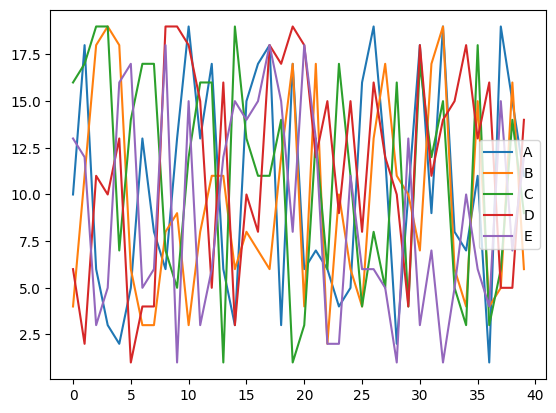

In [92]:
# Menggunakan plot untuk membuat grafik garis
df.plot(kind='line')

<Axes: >

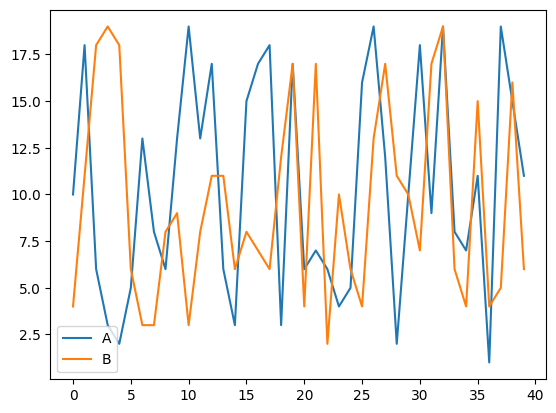

In [93]:
# Menggunakan plot untuk membuat grafik garis dari kolom 'A' dan 'B'
df[['A', 'B']].plot(kind='line')

### Bar Plot
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil - fungsi df.plot() yang diberi parameter kind yang bernilai bar.
Untuk menampilkan bar secara horizontal kita dapat menggantikan bar dengan barh.

In [94]:
df.head()

,A,B,C,D,E
0,10,4,16,6,13
1,18,11,17,2,12
2,6,18,19,11,3
3,3,19,19,10,5
4,2,18,7,13,16


<Axes: >

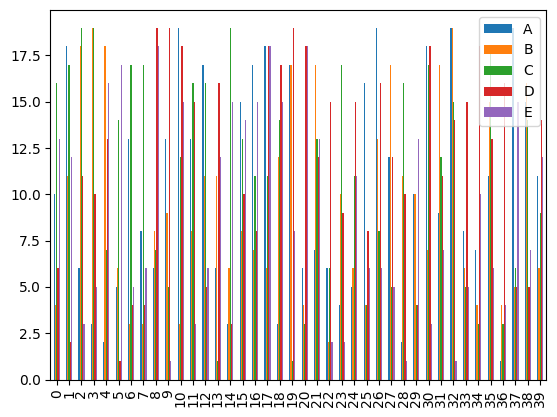

In [95]:
# Menggunakan plot untuk membuat grafik batang dari seluruh kolom
df.plot(kind='bar')

<Axes: >

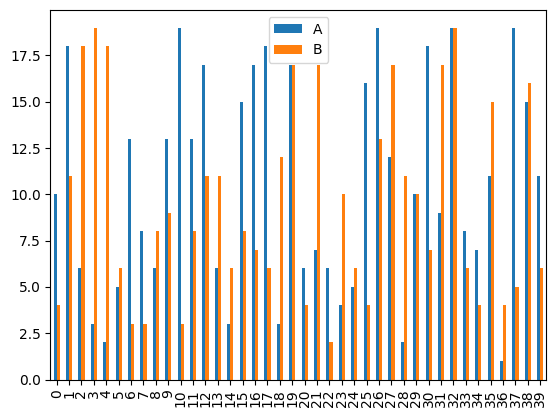

In [96]:
# Menggunakan plot untuk membuat grafik batang dari kolom A dan B
df[['A', 'B']].plot(kind='bar')

<Axes: >

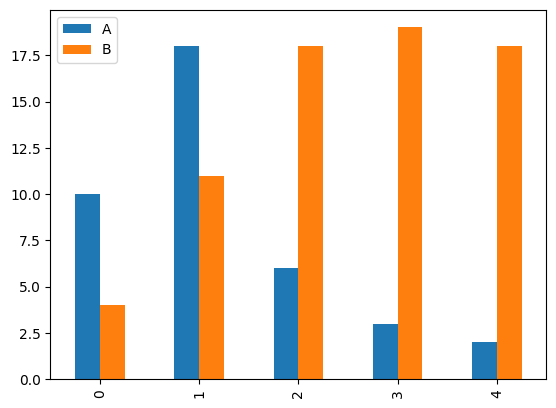

In [97]:
# Menggunakan plot untuk membuat grafik batang dari lima baris pertama kolom A dan B
df[['A', 'B']].head().plot(kind='bar')

<Axes: >

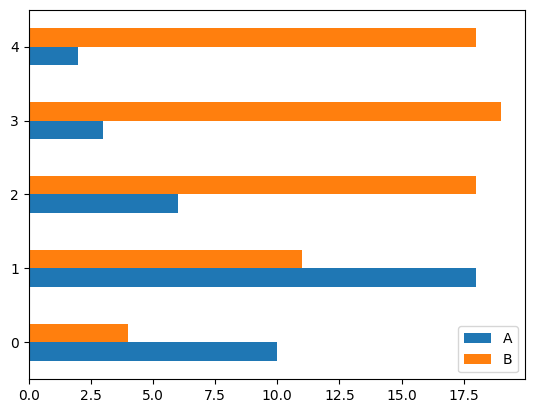

In [98]:
# Menggunakan plot untuk membuat grafik batang horizontal dari lima baris pertama kolom A dan B
df[['A', 'B']].head().plot(kind='barh')

## **Area Plot**
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai area.

In [99]:
df.head()

,A,B,C,D,E
0,10,4,16,6,13
1,18,11,17,2,12
2,6,18,19,11,3
3,3,19,19,10,5
4,2,18,7,13,16


<Axes: >

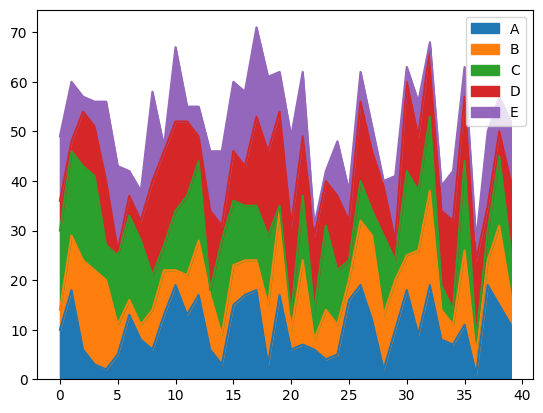

In [100]:
# Menggunakan plot untuk membuat grafik area dari seluruh dataframe
df.plot(kind='area')

<Axes: >

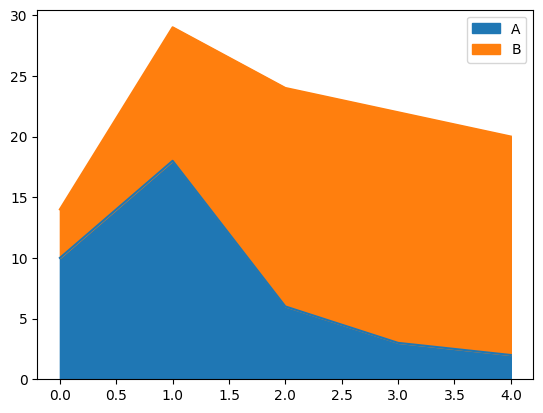

In [101]:
# Menggunakan plot untuk membuat grafik area dari kolom A dan B pada lima baris pertama dataframe
df[['A', 'B']].head().plot(kind='area')

## **Box Plot**
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai box.

In [102]:
df.head()

,A,B,C,D,E
0,10,4,16,6,13
1,18,11,17,2,12
2,6,18,19,11,3
3,3,19,19,10,5
4,2,18,7,13,16


<Axes: >

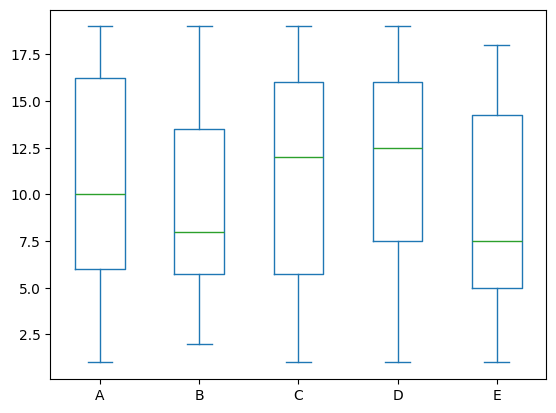

In [103]:
# Menggunakan plot untuk membuat box plot dari seluruh dataframe
df.plot(kind='box')

## **Histogram**
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai hist.

In [104]:
df.head()

,A,B,C,D,E
0,10,4,16,6,13
1,18,11,17,2,12
2,6,18,19,11,3
3,3,19,19,10,5
4,2,18,7,13,16


<Axes: ylabel='Frequency'>

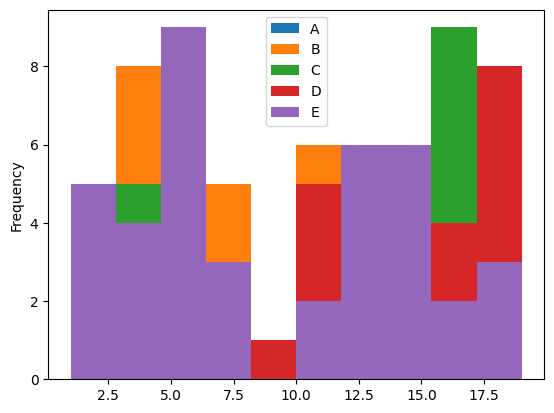

In [105]:
# Menggunakan plot untuk membuat histogram dari seluruh dataframe
df.plot(kind='hist')

<Axes: ylabel='Frequency'>

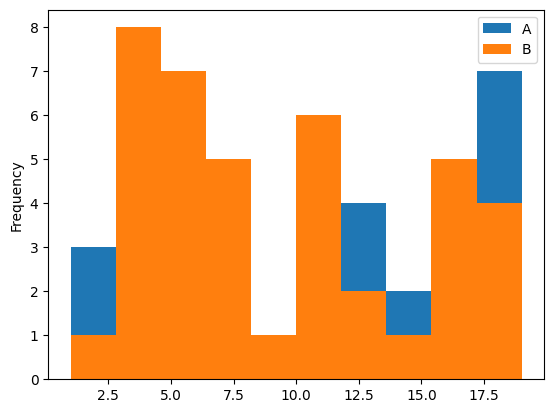

In [106]:
# Menggunakan plot untuk membuat histogram dari kolom 'A' dan 'B'
df[['A', 'B']].plot(kind='hist')

## **Kernel Density Estimation (KDE)**
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai kde.

In [107]:
df.head()

,A,B,C,D,E
0,10,4,16,6,13
1,18,11,17,2,12
2,6,18,19,11,3
3,3,19,19,10,5
4,2,18,7,13,16


<Axes: ylabel='Density'>

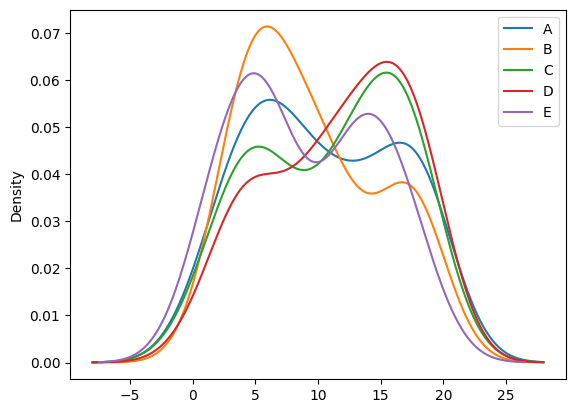

In [108]:
# Menggunakan plot untuk membuat KDE (Kernel Density Estimation) dari seluruh DataFrame
df.plot(kind='kde')

## **Scatter Plot**
- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai scatter.

In [109]:
df.head()

,A,B,C,D,E
0,10,4,16,6,13
1,18,11,17,2,12
2,6,18,19,11,3
3,3,19,19,10,5
4,2,18,7,13,16


<Axes: xlabel='A', ylabel='B'>

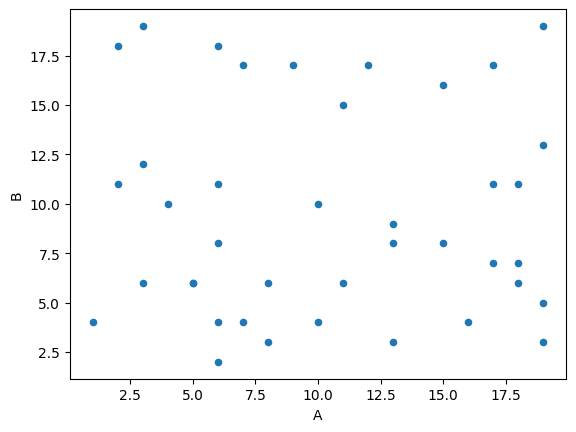

In [110]:
# Menggunakan plot untuk membuat scatter plot dengan sumbu x='A' dan sumbu y='B'
df.plot(x='A', y='B', kind='scatter')